In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
def imread(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### 1、Erosion腐蚀
在原图的卷积窗口内取局部最小值，这个核也叫做结构元素，结构元素可以是矩形、椭圆、十字形，用cv2.getStructuringElement()来生成不同的结构元素。

In [2]:
# 先生成不同形状的核
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))    # 矩形核，核的大小为（5,5）
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
print(kernel2)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


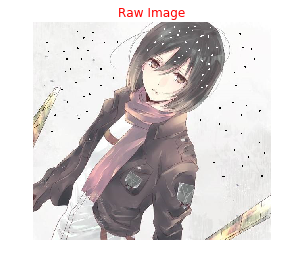

In [3]:
image = imread('./image/image2.jpg')
plt.title('Raw Image', color='red')
show(image)

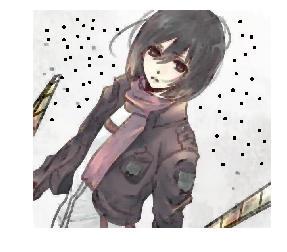

In [4]:
# 进行腐蚀，可以去除小白点，但整体颜色变暗；用开运算去除小白点效果更优
erosion = cv2.erode(image, kernel1, iterations=1)    # iterations:设置腐蚀的次数
# plt.figure(figsize=(10,10))
show(erosion)

### 2、Dilation膨胀
与腐蚀相反取的是局部最大值，cv2.dilate()

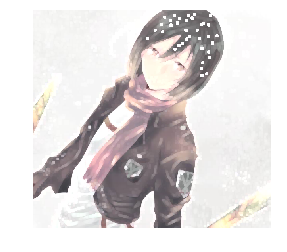

In [5]:
dilation = cv2.dilate(image, kernel1, iterations=1)
show(dilation)
# 膨胀dilate可以去除小黑点，但是整体颜色变量；用闭运算去除小黑点更优

### 3、Opening开运算
先腐蚀再膨胀，作用是可以消除小白点，用cv2.morphologyEx()来实现。

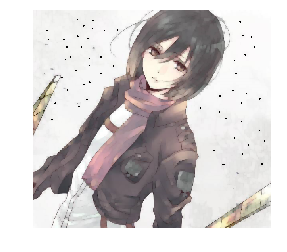

In [6]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel1)
show(opening)

### 4、closing闭运算
先膨胀后腐蚀，作用是消除小黑点

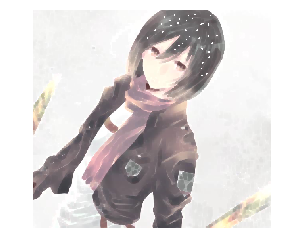

In [7]:
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel1)
show(closing)

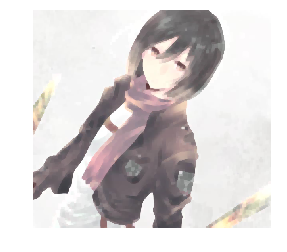

In [8]:
# 同时去除小黑点和小白点
## 先闭运算，后开运算
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel1)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel1)
show(opening)

虽然消除了小黑点和小白点，但是图片整体还是变模糊了。

### 5、Gradient梯度形态学
膨胀图-腐蚀图，最终得到的是物体的轮廓

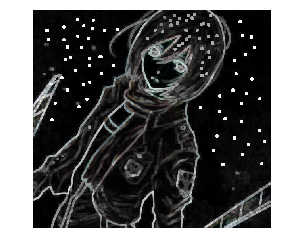

In [9]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel1)
show(gradient)

### 6、Top Hat/White Hat白帽
是原图减去开运算后的图，即src-opening。得到的是原始图片被去掉的白色部分。

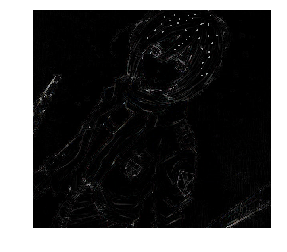

In [10]:
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel1)
show(tophat)

### 7、Black Hat黑帽
闭运算的图减去原图，closing-src。得到的是所去掉的黑色部分。

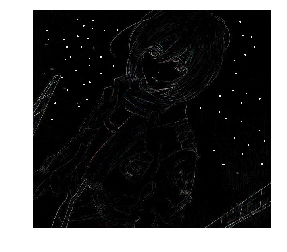

In [11]:
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel1)
show(blackhat)